In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
df = pd.read_excel("Intern.xlsx", sheet_name="DPPADPOSS-FATALITIES")

# 可选：标准化日期（用于后续时间趋势分析）
df["incident_date"] = pd.to_datetime(df["incident_date"], errors='coerce')
df["year"] = df["incident_date"].dt.year


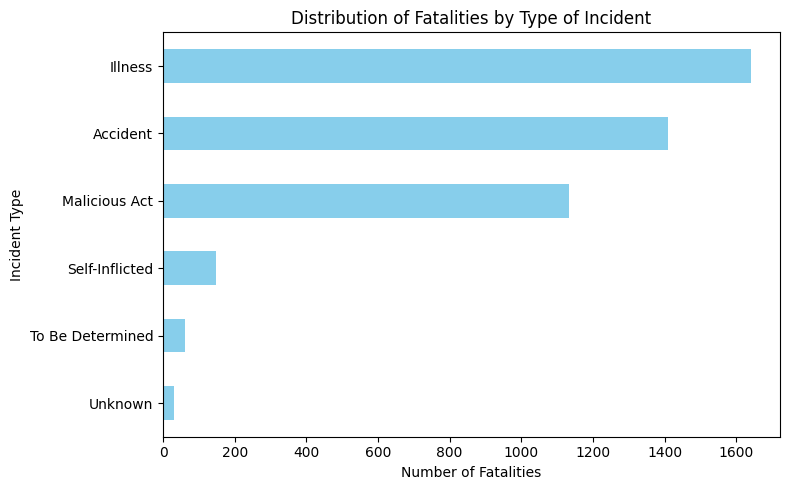

In [2]:
# 统计事件类型数量
incident_counts = df["type_of_incident"].value_counts().sort_values(ascending=True)

# 绘图
plt.figure(figsize=(8, 5))
incident_counts.plot(kind="barh", color="skyblue")
plt.title("Distribution of Fatalities by Type of Incident")
plt.xlabel("Number of Fatalities")
plt.ylabel("Incident Type")
plt.tight_layout()
plt.savefig("incident_type_bar.png", dpi=300)  # 保存图像（粘贴回Excel）
plt.show()


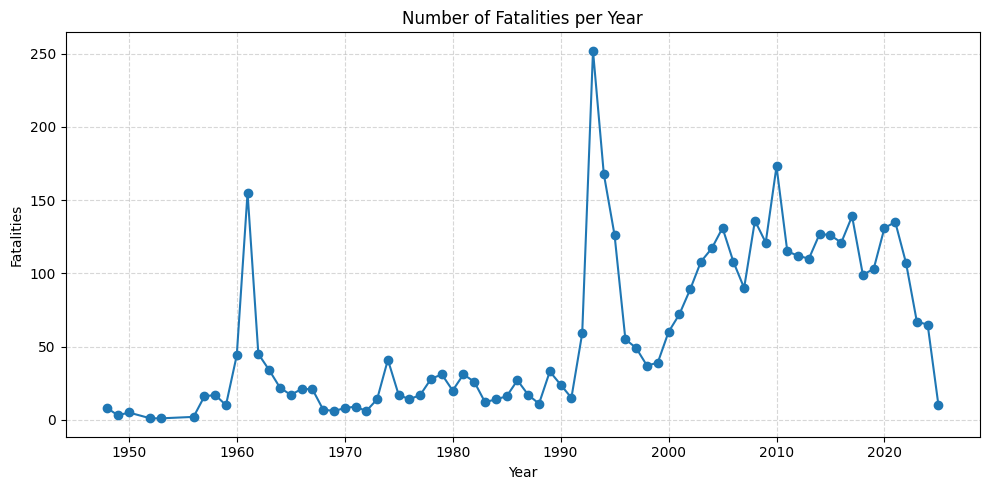

In [3]:
# 按年份聚合
yearly_deaths = df.groupby("year").size()

# 绘图
plt.figure(figsize=(10, 5))
yearly_deaths.plot(kind="line", marker="o")
plt.title("Number of Fatalities per Year")
plt.xlabel("Year")
plt.ylabel("Fatalities")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.savefig("yearly_fatalities_trend.png", dpi=300)
plt.show()


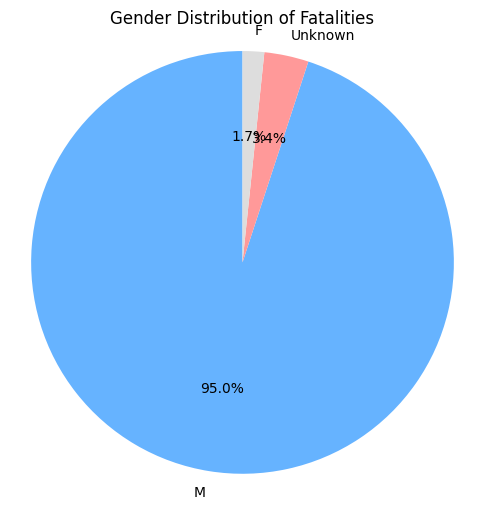

In [4]:
gender_counts = df["gender"].value_counts()

# 绘图
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=["#66b3ff", "#ff9999", "#dddddd"])
plt.title("Gender Distribution of Fatalities")
plt.axis('equal')
plt.savefig("gender_pie.png", dpi=300)
plt.show()


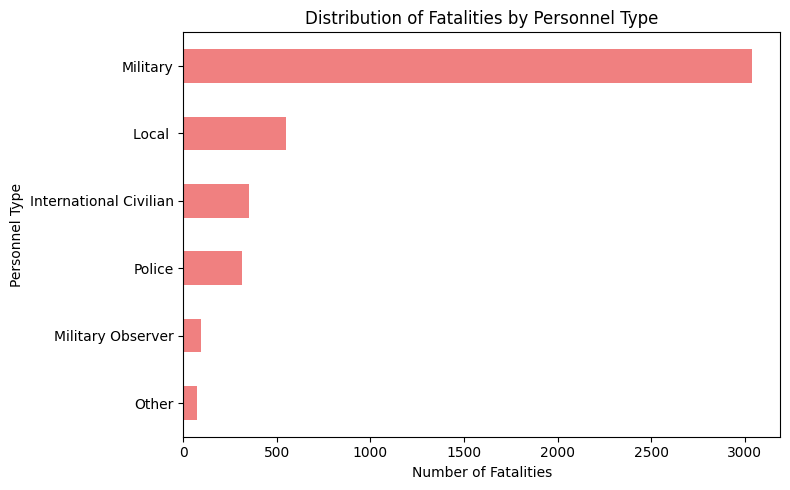

In [5]:
personnel_counts = df["casualty_personnel_type"].value_counts().sort_values()

plt.figure(figsize=(8, 5))
personnel_counts.plot(kind="barh", color="lightcoral")
plt.title("Distribution of Fatalities by Personnel Type")
plt.xlabel("Number of Fatalities")
plt.ylabel("Personnel Type")
plt.tight_layout()
plt.savefig("personnel_type_bar.png", dpi=300)
plt.show()


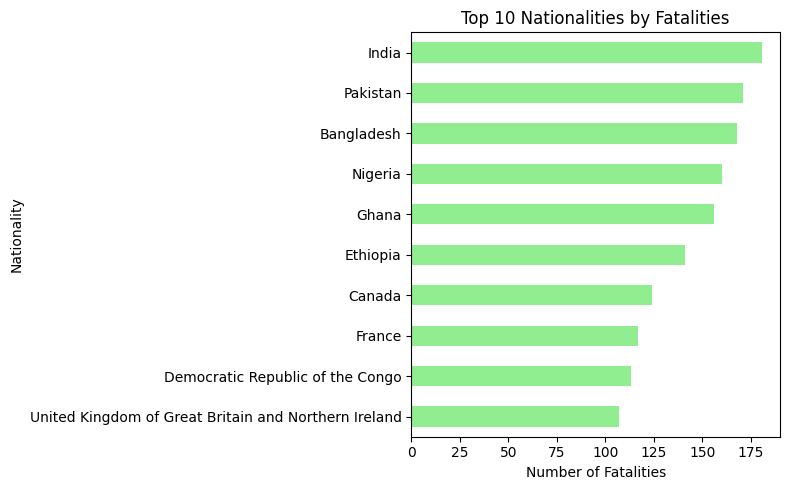

In [6]:
nationality_top10 = df["casualty_nationality"].value_counts().head(10).sort_values()

plt.figure(figsize=(8, 5))
nationality_top10.plot(kind="barh", color="lightgreen")
plt.title("Top 10 Nationalities by Fatalities")
plt.xlabel("Number of Fatalities")
plt.ylabel("Nationality")
plt.tight_layout()
plt.savefig("nationality_top10_bar.png", dpi=300)
plt.show()


<Figure size 1200x600 with 0 Axes>

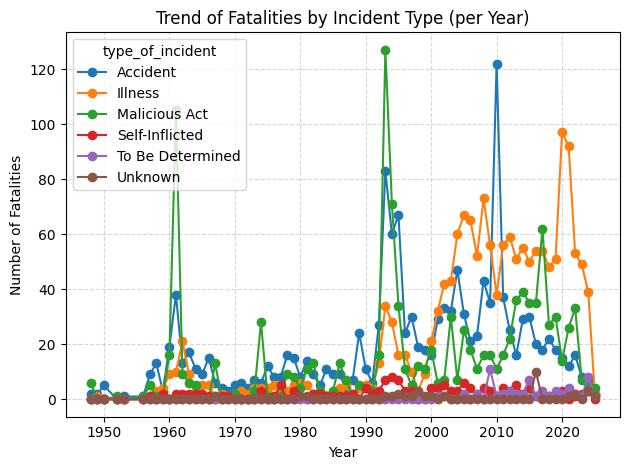

In [7]:
# 先确保年份列存在
df["year"] = pd.to_datetime(df["incident_date"], errors="coerce").dt.year

# 生成透视表：按 year 和 type_of_incident 分组计数
incident_trend = df.pivot_table(index="year", columns="type_of_incident", aggfunc="size", fill_value=0)

# 绘图
plt.figure(figsize=(12, 6))
incident_trend.plot(marker='o')
plt.title("Trend of Fatalities by Incident Type (per Year)")
plt.xlabel("Year")
plt.ylabel("Number of Fatalities")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.savefig("incident_type_trend.png", dpi=300)
plt.show()


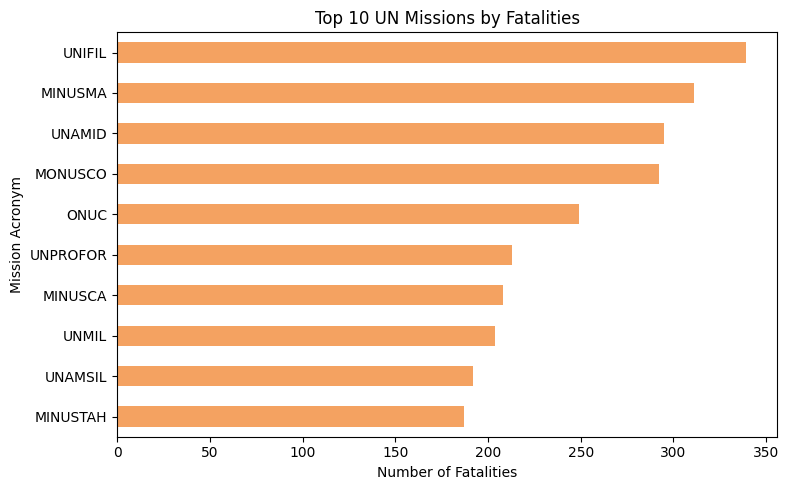

In [8]:
mission_counts = df["mission_acronym"].value_counts().head(10).sort_values()

# 绘图
plt.figure(figsize=(8, 5))
mission_counts.plot(kind="barh", color="#f4a261")
plt.title("Top 10 UN Missions by Fatalities")
plt.xlabel("Number of Fatalities")
plt.ylabel("Mission Acronym")
plt.tight_layout()
plt.savefig("top10_missions.png", dpi=300)
plt.show()


In [3]:
import plotly.express as px

# 按 isocode3 聚合数量
country_counts = df["isocode3"].value_counts().reset_index()
country_counts.columns = ["iso_alpha", "fatalities"]

# 绘制世界地图热力图
fig = px.choropleth(country_counts,
                    locations="iso_alpha",
                    color="fatalities",
                    color_continuous_scale="Reds",
                    projection="natural earth",
                    title="Global Fatalities Distribution by Country")

fig.write_image("fatalities_world_map.png", scale=2)
fig.show()
